# Chapter 4. 머신러닝에 필요한 수학의 기본


## 벡터

In [ ]:
import numpy as np

벡터 정의

In [ ]:
a = np.array([2,1])
print(a)

[2 1]


type을 활용해 벡터 형식 확인

In [ ]:
type(a)

numpy.ndarray

In [ ]:
c = np.array([[1, 2],[3, 4]])
print(c)

[[1 2]
 [3 4]]


세로 벡터 나타내기

In [ ]:
d = np.array([[1],[2]])
print(d)

[[1]
 [2]]


변수명.T로 전치

In [ ]:
print(d.T)

[[1 2]]


벡터의 덧셈과 뺄셈은 각 요소를 더하고 빼면 됨

In [ ]:
a = np.array([2, 1])
b = np.array([1, 3])
print(a + b)

[3 4]


In [ ]:
a = np.array([2, 1])
b = np.array([1, 3])
print(a - b)

[ 1 -2]


곱셈은 스칼라 값이 벡터의 요소 전체에 적용

In [ ]:
print(2 * a)

[4 2]


내적은 같은 차원을 가진 두 벡터간의 연산에서 나타남

대응하는 요소들을 곱한 뒤 더한 값

변수명1.dot(변수명2)로 계산

내적은 두 벡터의 유사성과 관련

-> 큰 값이라면 비슷한 방향, 작은 값이라면 수직에 가까울 때

In [ ]:
b = np.array([1, 3])
c = np.array([4, 2])
print(b.dot(c))

10


np.linalg.norm()으로 벡터의 크기를 구할 수 있음

In [ ]:
a = np.array([1, 3])
print(np.linalg.norm(a))

3.1622776601683795


합을 내적으로 계산하기

for문을 사용하는 것과 같은 효과를 낼 수 있음

In [ ]:
import numpy as np
a = np.ones(1000)
b = np.arange(1,1001)
print(a.dot(b))

500500.0


## 미분

머신러닝은 함수에서 최소나 최대인 입력을 찾는 문제

함수의 최소 지점은 기울기가 0이 되는 성질 -> 기울기를 도출하는 방법이 미분

loss 함수의 최솟값을 구하기 위한 방법으로 미분 사용

## 편미분

머신러닝에서 실제로 사용하는 것

편미분의 계산 방법은 편미분하는 변수에만 주목해서 미분하는 것

$σf/σw_0$ 는 $w0$축에 평행이 되도록 $f$를 칼로 잘랐을 때의 단면

### 경사를 그림으로 나타내기

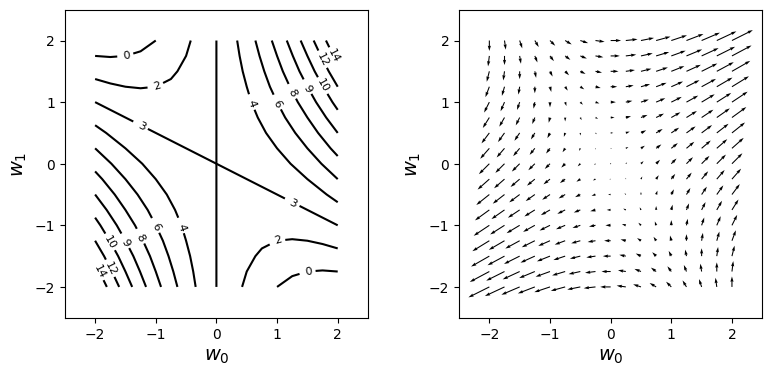

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(w0, w1):
    return w0**2 + 2 * w0 * w1 + 3
def df_dw0(w0, w1):
    return 2 * w0 + 2 * w1
def df_dw1(w0, w1):
    return 2 * w0 + 0 * w1


w_range = 2
dw = 0.25
w0 = np.arange(-w_range, w_range + dw, dw)
w1 = np.arange(-w_range, w_range + dw, dw)
wn = w0.shape[0]
ww0, ww1 = np.meshgrid(w0, w1)
ff = np.zeros((len(w0), len(w1)))
dff_dw0 = np.zeros((len(w0), len(w1)))
dff_dw1 = np.zeros((len(w0), len(w1)))
for i0 in range(wn):
    for i1 in range(wn):
        ff[i1, i0] = f(w0[i0], w1[i1])
        dff_dw0[i1, i0] = df_dw0(w0[i0], w1[i1])
        dff_dw1[i1, i0] = df_dw1(w0[i0], w1[i1])

plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1, 2, 1)
cont = plt.contour(ww0, ww1, ff, 10, colors='k')
cont.clabel(fmt='%2.0f', fontsize=8)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)


plt.subplot(1, 2, 2)
plt.quiver(ww0, ww1, dff_dw0, dff_dw1)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)
plt.show()

결과

화살표의 방향 : 경사가 높은 쪽을 향함

화살표의 길이 : 경사의 가파른 정도

화살표를 살펴보면 함수의 최대최소를 찾을 수 있음 따라서 머신러닝에서 이렇게 최소점을 구함

## 행렬

In [ ]:
import numpy as np

행렬은 각 행을 []로 묶고 전체를 []로 묶는 이중 구조

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [ ]:
B = np.array([[7, 8, 9], [10, 11, 12]])
print(B)

[[ 7  8  9]
 [10 11 12]]


행렬의 뺄셈 덧셈은 같은 크기의 행렬끼리 대응하는 요소에 연산을 수행

In [ ]:
print(A + B)
print(A - B)

[[ 8 10 12]
 [14 16 18]]
[[-6 -6 -6]
 [-6 -6 -6]]


스칼라 값 곱할 때는 모든 요소에 곱함

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(2*A)

[[ 2  4  6]
 [ 8 10 12]]


행렬의 내적 계산

In [ ]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print(A.dot(B))

32


*를 사용하면 대응하는 요소끼리의 곱셈

In [ ]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print(A * B)

[ 4 10 18]


/를 사용하면 대응하는 요소끼리 나눗셈

In [ ]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print(A / B)

[0.25 0.4  0.5 ]


L X M 행렬과 M X N 행렬의 곱

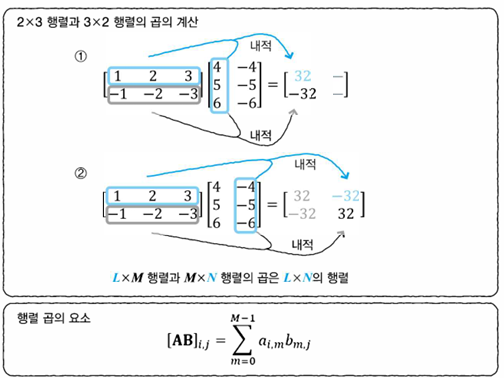

In [ ]:
A = np.array([[1, 2, 3], [-1, -2, -3]])
B = np.array([[4, -4], [5, -5], [6, -6]])
print(A.dot(B))

[[ 32 -32]
 [-32  32]]


단위행렬이란 대각성분이 1이고 그 외에는 0인 행렬

np.identity(n) 명령으로 n x n 단위행렬 생성

In [ ]:
print(np.identity(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


어떤 행렬에 단위 행렬을 곱해도 행렬은 변하지 않음

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
I = np.identity(3)
print(A.dot(I))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


## 역행렬

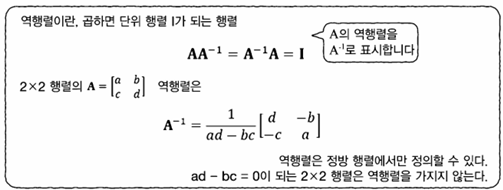

행렬곱은 순서에 따라 결과가 달라지지만 역행렬은 순서에 상관 없이 단위 행렬이 됨

np.linalg.inv(A)에서 A의 역행렬을 구할 수 있음

In [ ]:
A = np.array([[1, 2],[3, 4]])
invA = np.linalg.inv(A)
print(invA)

[[-2.   1. ]
 [ 1.5 -0.5]]


행렬에서의 전치

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
print(A.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


## 지수함수와 로그함수

### 지수 함수

- a > 1은 단조 증가

- 0 < a < 1은 단조 감소

- 함수의 출력은 항상 양수

- 밑이 클수록 그래프는 급격히 증가

- 항상 0보다 위에 있어서 모두 양수로 옮기는 함수

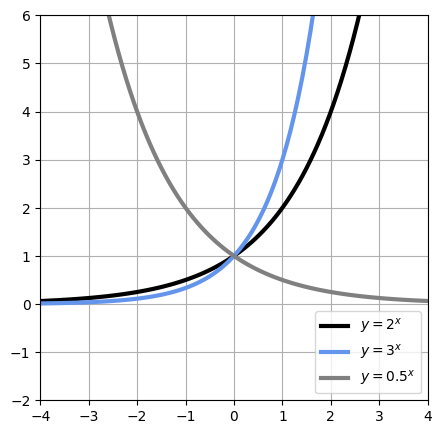

In [ ]:
import numpy as np
import matplotlib.pyplot as pit
%matplotlib inline
x = np.linspace(-4,4,100)
y=2**x
y2=3**x
y3=0.5**x

plt.figure(figsize=(5,5))
plt.plot(x,y,'black',linewidth=3,label='$y=2^x$')
plt.plot(x,y2,'cornflowerblue',linewidth=3,label='$y=3^x$')
plt.plot(x,y3,'gray',linewidth=3,label='$y=0.5^x$')
plt.ylim(-2,6)
plt.xlim(-4,4)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()

### 로그 함수

지수함수의 역함수 -> $y = x$ 선에서 대칭

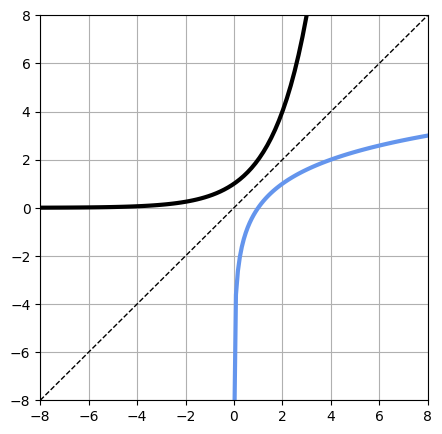

In [ ]:
x = np.linspace(-8, 8, 100)
y = 2**x

x2 = np.linspace(0.001, 8, 100)
y2 = np.log(x2) / np.log(2)
plt.figure(figsize=(5, 5))
plt.plot(x, y, 'black', linewidth=3)
plt.plot(x2, y2, 'cornflowerblue', linewidth=3)
plt.plot(x, x, 'black', linestyle='--', linewidth=1)
plt.ylim(-8, 8)
plt.xlim(-8, 8)
plt.grid(True)
plt.show()

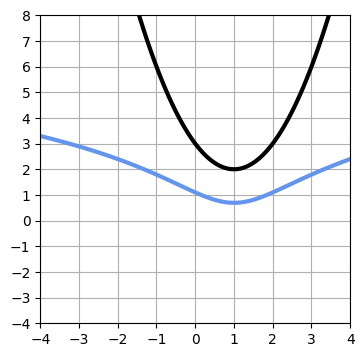

In [ ]:
x = np.linspace(-4, 4, 100)
y = (x - 1)**2 + 2
logy = np.log(y)


plt.figure(figsize=(4, 4))
plt.plot(x, y, 'black', linewidth=3)
plt.plot(x, logy, 'cornflowerblue', linewidth=3)
plt.yticks(range(-4,9,1))
plt.xticks(range(-4,5,1))
plt.ylim(-4, 8)
plt.xlim(-4, 4)
plt.grid(True)
plt.show()

$y = (𝑥−1)2+2$ 함수와 $log$를 취한 함수의 그래프

-> 로그를 취해도 최소 위치는 변화지 않음

### 지수함수의 미분

함수 $y = a^x$는 미분하면 원래 식 $log\,a$에 곱해진 형태

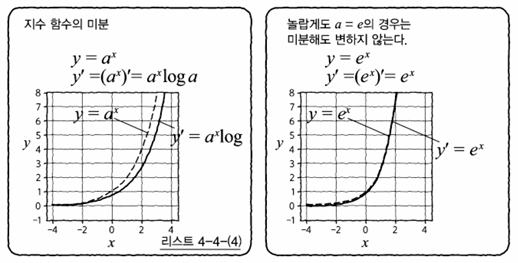

미분해도 형태가 변하지 않아 밑을 $e$로 사용한 지수 함수를 다양한 곳에서 사용

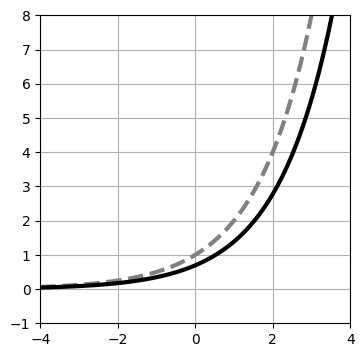

In [ ]:
x = np.linspace(-4,4,100)
a=2
y=a**x
dy=np.log(a)*y

plt.figure(figsize=(4,4))
plt.plot(x,y,'gray',linestyle='--',linewidth=3)
plt.plot(x,dy,color='black',linewidth=3)
plt.ylim(-1,8)
plt.xlim(-4,4)
plt.grid(True)
plt.show()

### 로그 함수의 미분

반비례의 식이 됨

$x$ -> $\frac{1}{x}$

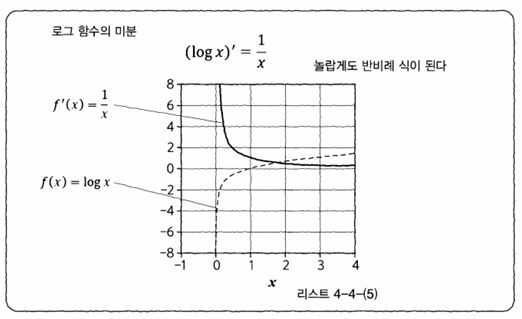

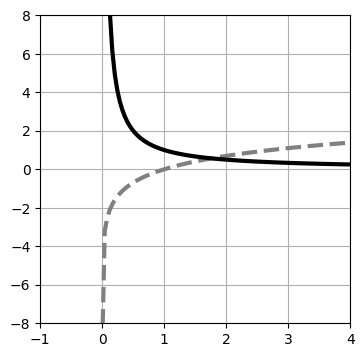

In [ ]:
x=np.linspace(0.0001,4,100)
y=np.log(x)
dy=1/x

plt.figure(figsize=(4,4))
plt.plot(x,y,'gray',linestyle='--',linewidth=3)
plt.plot(x,dy,color='black',linewidth=3)
plt.ylim(-8,8)
plt.xlim(-1,4)
plt.grid(True)
plt.show()

### 시그모이드 함수

매끄러운 계단 같은 함수

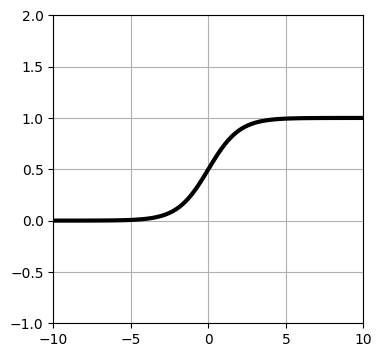

In [ ]:
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.figure(figsize=(4,4))
plt.plot(x,y,'black',linewidth=3)

plt.ylim(-1,2)
plt.xlim(-10,10)
plt.grid(True)
plt.show()

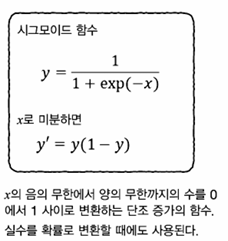

음에서 양의 실수를 0에서 1까지의 사이로 변환해 확률을 나타낼 때 자주 사용

분류문제, 신경망에서 뉴런의 특성을 나타내는 중요한 함수

### 소프트맥스 함수

대소를 관계를 유지하면서 각각의 확률을 나타내는 수로 변환할 때 사용

In [ ]:
def softmax(x0,x1,x2):
    u=np.exp(x0)+np.exp(x1)+np.exp(x2)
    return np.exp(x0) / u, np.exp(x1) / u, np.exp(x2) / u

y=softmax(2,1,-1)
print(np.round(y,2))
print(np.sum(y))

[0.71 0.26 0.04]
1.0


그림으로 소프트맥스 함수 보기

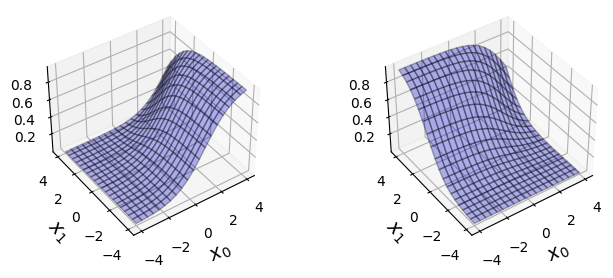

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

xn =20
x0 = np.linspace(-4,4,xn)
x1 = np.linspace(-4,4,xn)

y=np.zeros((xn,xn,3))

for i0 in range(xn):
    for i1 in range(xn):
        y[i1,i0,:]=softmax(x0[i0],x1[i1],1)

xx0,xx1 = np.meshgrid(x0,x1)
plt.figure(figsize=(8,3))
for i  in range(2):
    ax = plt.subplot(1,2,i+1,projection='3d')
    ax.plot_surface(xx0,xx1,y[:,:,i],
                    rstride=1,cstride=1,alpha=0.3
                   ,color='blue',edgecolor='black')
    ax.set_xlabel('$x_0$',fontsize=14)
    ax.set_ylabel('$x_1$',fontsize=14)
    ax.view_init(40,-125)

plt.show()

### 소프트맥스 함수와 시그모이드 함수

두 변수의 소프트맥스 함수의 입력을 그 차이로 나타낸 것이 시그모이드 함수

- 시그모이드 함수를 다변수로 확장한 것이 소프트맥스 함수

### 가우스 함수

$y = exp(-x^2)$

$x = 0$을 중심으로 종모양을 하고 있음

곡선을 근사하는 기저함수

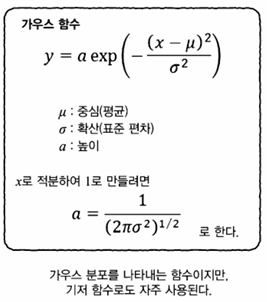

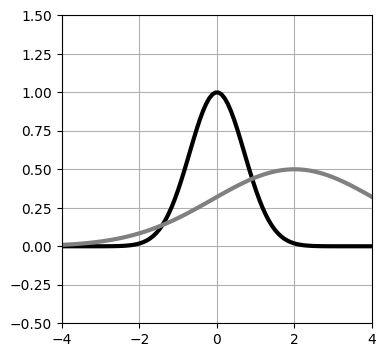

In [ ]:
def gauss(mu,sigma,a):
    return a*np.exp(-(x-mu)**2/sigma**2)

x=np.linspace(-4,4,100)
plt.figure(figsize=(4,4))
plt.plot(x,gauss(0,1,1),'black',linewidth=3)
plt.plot(x,gauss(2,3,0.5),color='gray',linewidth=3)
plt.ylim(-.5,1.5)
plt.xlim(-4,4)
plt.grid(True)
plt.show()

가우스 함수에서 확률 분포를 나타내려면 x에 관한 적분이 1이 되도록 만든다

### 2차원 가우스 함수

원점을 중심으로 동심원을 가진 종모양

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline


def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2 * np.pi)**(D / 2)
    c2 = 1 / (np.linalg.det(sigma)**(1 / 2))
    inv_sigma = np.linalg.inv(sigma)
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 = c5 + c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5 / 2)
    return p

In [ ]:
x = np.array([[1, 2], [2, 1], [3, 4]])
mu = np.array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


### 등고선과 3차원으로 표시한 그래프

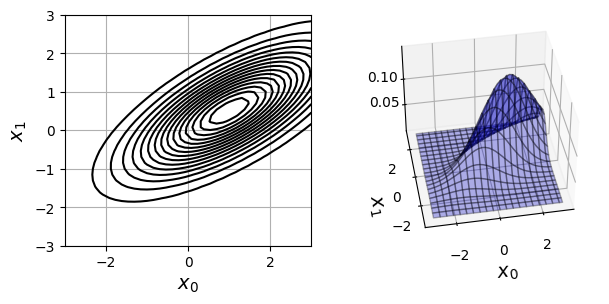

In [ ]:
X_range0=[-3,3]
X_range1=[-3,3]


def show_contour_gauss(mu, sig):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
    f = gauss(x, mu, sig)
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, 15, colors='k')
    plt.grid(True)

def show3d_gauss(ax, mu, sig):
    xn = 40
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn,'F'), np.reshape(xx1, xn * xn, 'F')]
    f = gauss(x, mu, sig)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f,
                    rstride=2, cstride=2, alpha=0.3,
                    color='blue', edgecolor='black')

mu = np.array([1, 0.5]) # (A)
sigma = np.array([[2, 1], [1, 1]]) # (B)
Fig = plt.figure(1, figsize=(7, 3))
Fig.add_subplot(1, 2, 1)
show_contour_gauss(mu, sigma)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_gauss(Ax, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.show()

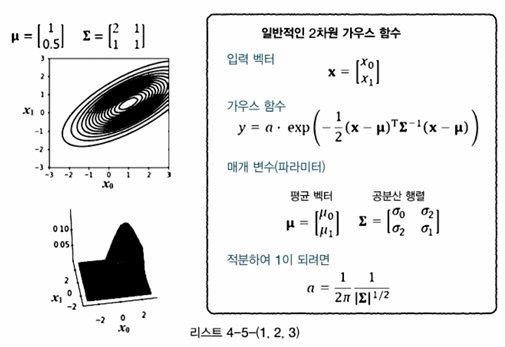